This notebook is designed to find the best method of converting pdf to text

The previous cohort left a message that pytesseract wasn't converting the pdf to text perfectly. 




Note: This notebook was done in colab

Before, I tried using pyPDF2 to get pdf to text but that method was returning a blank for me so I moved on to another method. The next method involved using a optical character recognition (ocr) tool. That reads the pdf and converts it to an image and converts that to text. 

[pytesseract](https://pypi.org/project/pytesseract/)

Notes: there are other methods you can tinker with like preproccessing the image with cv2 before calling it to text. Because of the method I used to turn the pdf to an image, I couldn't get cv2 to work nicely because it wants a png file. 

In [7]:
# these installs have to be ran for tesseract to work
!apt-get install poppler-utils
!apt-get install tesseract-ocr
#
!pip install pyPDF2
!pip install pdf2image
!pip install pytesseract


  Using cached https://files.pythonhosted.org/packages/e2/0d/dcee3dd0fc4c7bcd18125a98f8ba6d9db7aecaa40770595203e312649587/tesseract-ocr-0.0.1.tar.gz
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-lmigdvn7/tesseract-ocr/setup.py'"'"'; __file__='"'"'/tmp/pip-install-lmigdvn7/tesseract-ocr/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-qcmsgrxr/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [31]:
# some of these imports are here because I forgot which ones I used 
import PyPDF2
import pytesseract
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image
from PIL import Image
import cv2

You can use any pdf to test. 

If you're in human rights first, just download a case from the google drive. I renamed the case on colab to make it easier to call

<class 'list'>


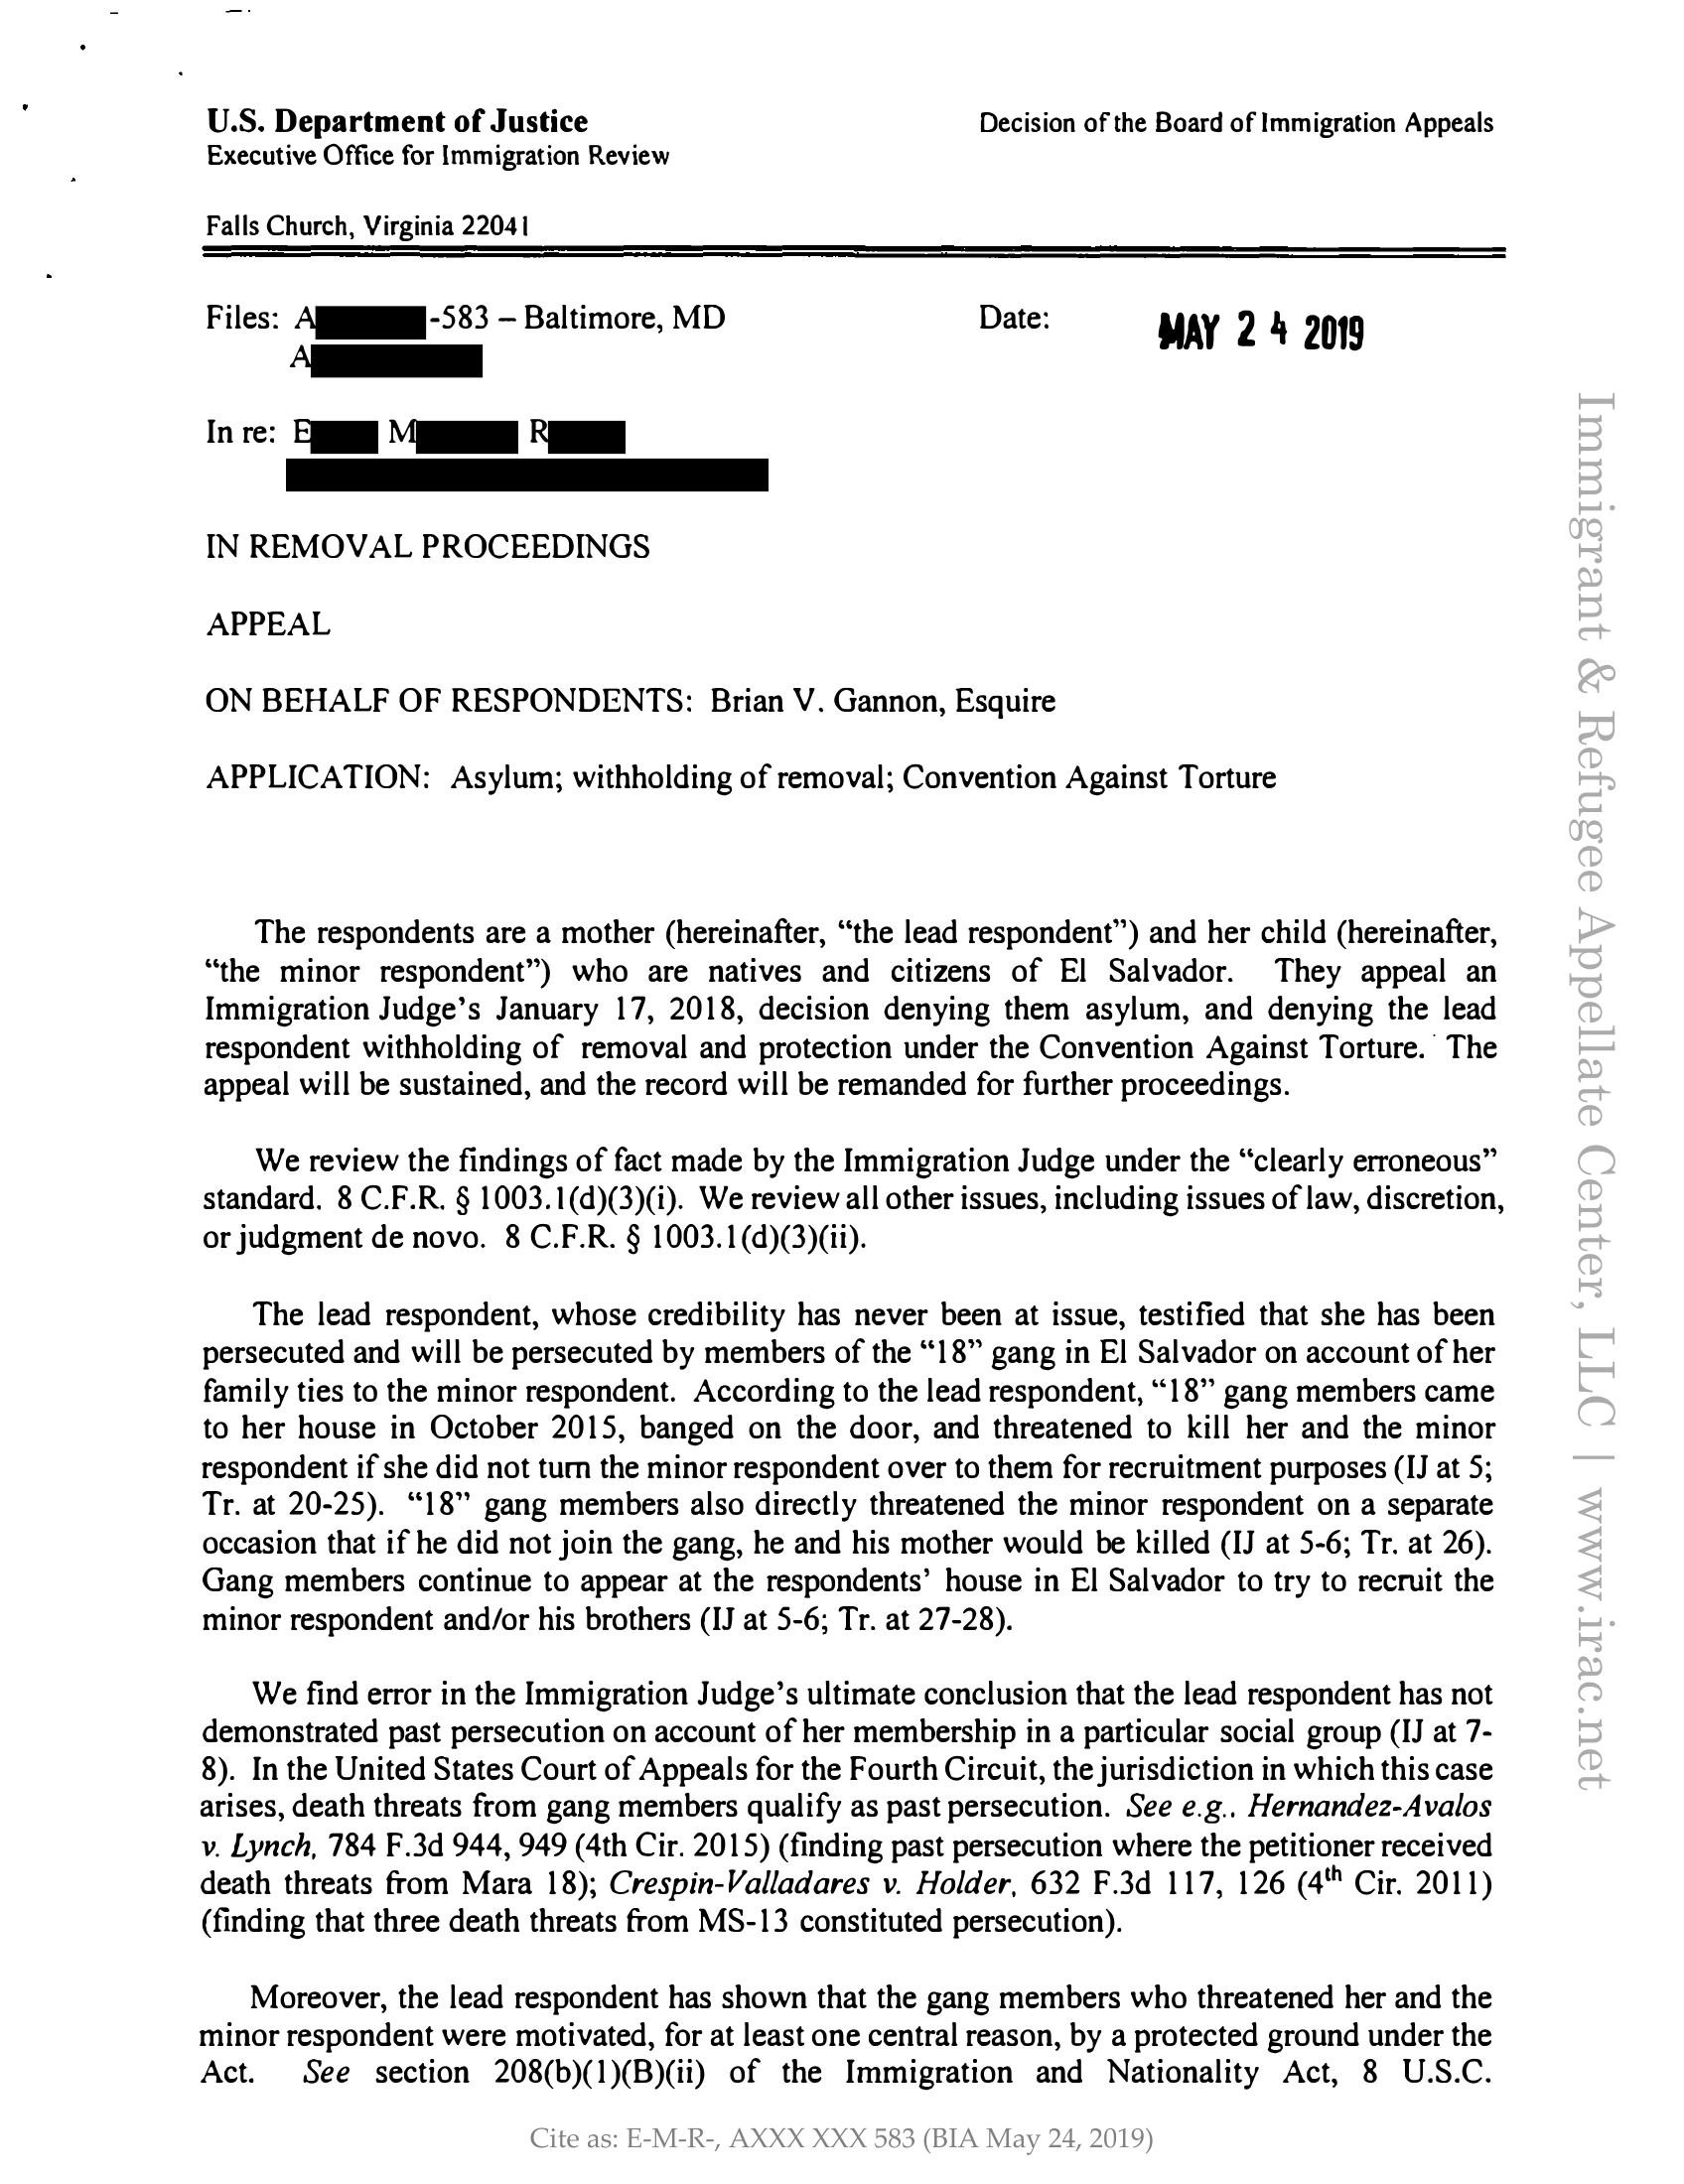

None


In [56]:
# this converts the pdf to an image and we can display it
images = convert_from_bytes(open('dummy_case2.pdf', 'rb').read())  # you can use a size= parameter to shrink or blow up the image.
                                                                   # I think size=800 is nice to view but it will mess with the accuracy 
# this is the list of pages 
print(type(images))
# to look at 1 at a time you have to call the index 
print(display(images[1]))
# uses pytesseract to convert the imgage to text
text = pytesseract.image_to_string(images[1])

In [57]:
# check out the accuracy with the text and file  
print(text)

U.S. Department of Justice Decision of the Board of Immigration Appeals
Executive Office for Immigration Review

Falls Church, Virginia 22041

Files: Al-583 — Baltimore, MD Date: MAY 2 4 2019
A

In re: Ea i RE

IN REMOVAL PROCEEDINGS
APPEAL
ON BEHALF OF RESPONDENTS: Brian V. Gannon, Esquire

APPLICATION: Asylum; withholding of removal; Convention Against Torture

The respondents are a mother (hereinafter, “the lead respondent”) and her child (hereinafter,
“the minor respondent”) who are natives and citizens of El Salvador. They appeal an
Immigration Judge’s January 17, 2018, decision denying them asylum, and denying the lead
respondent withholding of removal and protection under the Convention Against Torture.’ The
appeal will be sustained, and the record will be remanded for further proceedings.

We review the findings of fact made by the Immigration Judge under the “clearly erroneous”
standard. 8 C.F.R. § 1003.1(d)(3)(i). We review all other issues, including issues of law, discretio

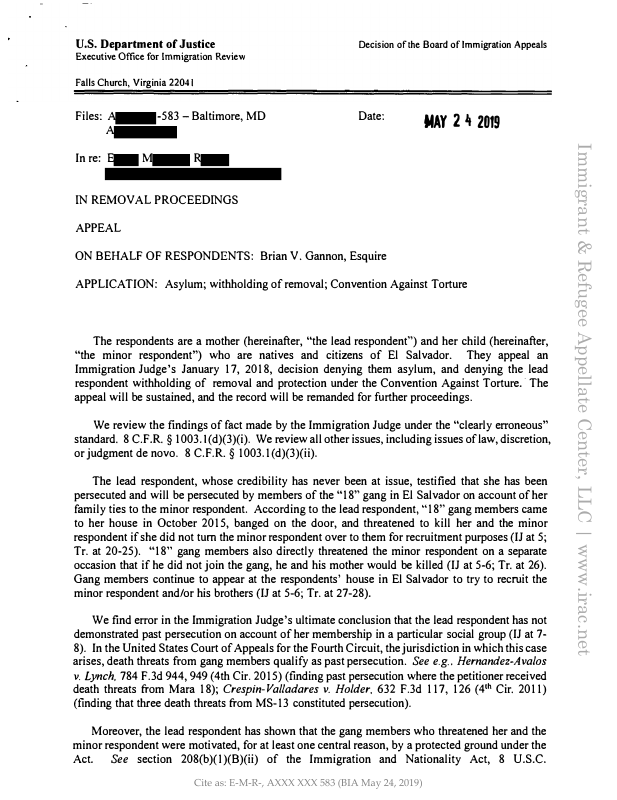

None
U.S. Department of Justice Decision of the Board af immigration Appeals
Executive Office for Immigration Review

 

Files: AlM-583 ~ Baltimore, MD Date:
—_ ‘MAY 2.4 2019

IN REMOVAL PROCEEDINGS.
APPEAL
(ON BEHALF OF RESPONDENTS: Brian V. Gannon, Esquire

APPLICATION: Asylum; withholding of removal; Convention Against Torture

 

‘The respondents are a mother (hereinafter, “the lead respondent”) and her child (hereinafter,
“the minor respondent") who are natives and citizens of El Salvador. They appeal an
‘Immigration Judge’s January 17, 2018, decision denying them asylum, and denying the lead
respondent withholding of removal and protection under the Convention Against Torture. The
appeal will be sustained, and the record will be remanded for further proceedings.

We review the findings of fact made by the Immigration Judge under the “clearly erroneous”
standard. 8 C.F.R. § 1003.1(4)(3)(). We review all other issues, including issues of law, discretion,
‘or judgment de novo. 8 C.F

In [60]:
images1 = convert_from_bytes(open('dummy_case2.pdf', 'rb').read(), size=800)

print(display(images1[1]))

text1 = pytesseract.image_to_string(images1[1])
# look at the difference when the img is shrunk down 
print(text1)

The last line on the second paragraph is: 
* minor respondent and/or his brothers (IJ at 5-6; Tr. at 27-28).

When you use size=800 it becomes:
* ‘minor respondent and/or his brothers (I at 5-6; Te. at 27-28),



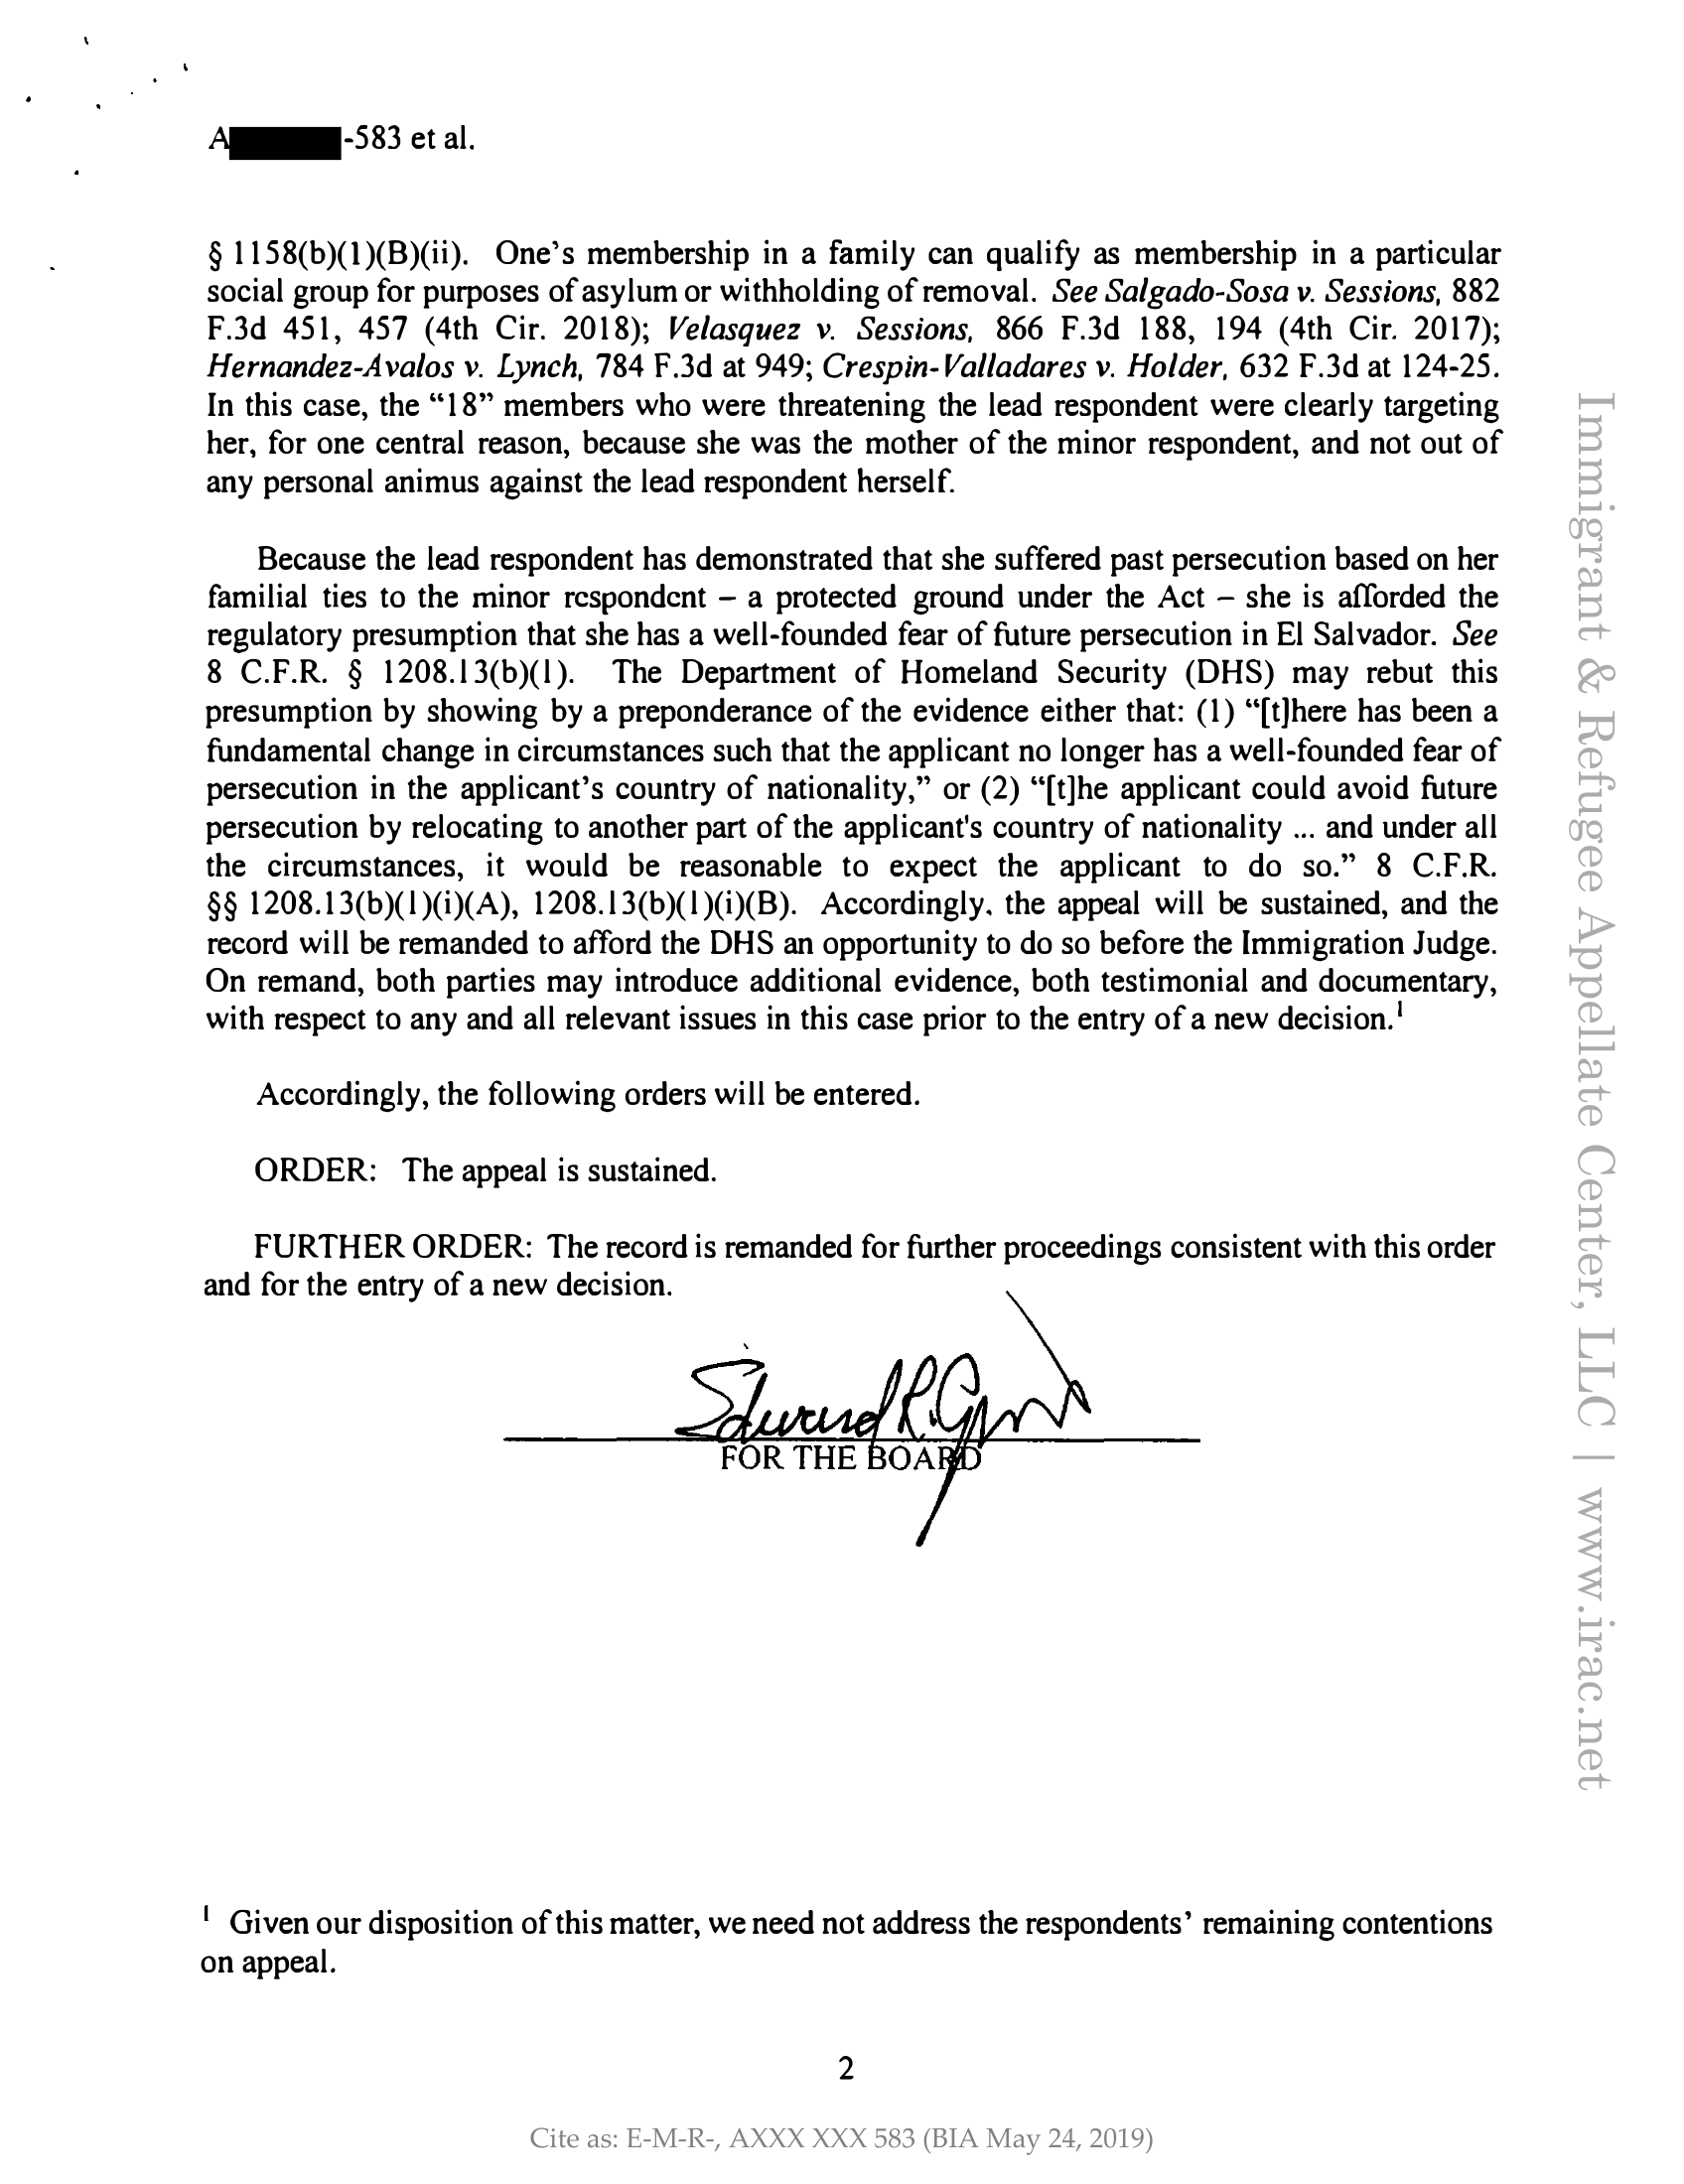

None


In [62]:
# testing accuracy of another page
print(display(images[2]))
page2text = pytesseract.image_to_string(images[2])

In [65]:
print(page2text)

ABBE -583 et al.

§ 1158(b)(1)(B)(ii). One’s membership in a family can qualify as membership in a particular
social group for purposes of asylum or withholding of removal. See Salgado-Sosa v. Sessions, 882
F.3d 451, 457 (4th Cir. 2018); Velasquez v. Sessions, 866 F.3d 188, 194 (4th Cir. 2017);
Hernandez-Avalos v. Lynch, 784 F.3d at 949; Crespin-Valladares v. Holder, 632 F.3d at 124-25.
In this case, the “18” members who were threatening the lead respondent were clearly targeting
her, for one central reason, because she was the mother of the minor respondent, and not out of
any personal animus against the lead respondent herself.

Because the lead respondent has demonstrated that she suffered past persecution based on her
familial ties to the minor respondent — a protected ground under the Act — she is afforded the
regulatory presumption that she has a well-founded fear of future persecution in El Salvador. See
8 C.F.R. § 1208.13(b)(1). The Department of Homeland Security (DHS) may reb